In [1]:
import pandas as pd

data = pd.read_csv('Credit_Card_Applications.csv')

print(data.head())

   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  


In [10]:
from sklearn.preprocessing import MinMaxScaler
X = data.drop(['CustomerID', 'Class'], axis=1)
y = data['Class']  
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("\nAfter preprocessing:")
print("Features shape:", X_scaled.shape)


After preprocessing:
Features shape: (690, 14)


In [11]:
print("\nTarget variable 'Class' removed")
print("Features shape:", X_scaled.shape)


Target variable 'Class' removed
Features shape: (690, 14)


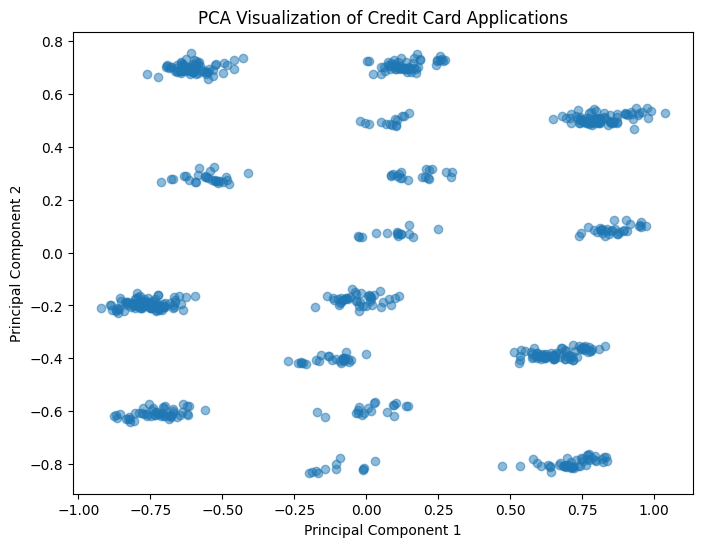

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title("PCA Visualization of Credit Card Applications")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [14]:
from minisom import MiniSom
import numpy as np

def train_som(grid_size, data, iterations=1000):
    som = MiniSom(grid_size[0], grid_size[1], data.shape[1], 
                 sigma=1.0, learning_rate=0.5)
    som.random_weights_init(data)
    som.train_random(data, iterations)
    return som

grid_sizes = [(5,5), (7,7), (10,10)]
results = {}

for size in grid_sizes:
    som = train_som(size, X_scaled)
    cluster_labels = np.array([som.winner(x) for x in X_scaled])
    cluster_labels = cluster_labels[:,0] * size[1] + cluster_labels[:,1]
    results[size] = {'model': som, 'labels': cluster_labels}


First 5 cluster centroids:
[[5.28951311e-01 1.61232961e-01 2.29681301e-01 3.78406692e-01
  4.20791869e-01 6.20675485e-01 1.18119308e-02 2.42384527e-01
  1.26735652e-07 2.64900087e-09 2.42399336e-01 4.08132071e-01
  1.11299561e-01 2.29532730e-03]
 [9.68440531e-01 1.61941987e-01 1.60314189e-01 4.91113250e-01
  5.93164109e-01 4.27639415e-01 3.00260080e-02 3.53175445e-02
  1.76275740e-02 2.89383903e-03 1.77229098e-02 2.36846767e-01
  7.09593497e-02 9.07130558e-04]
 [9.99987688e-01 3.29035926e-01 1.32122741e-01 4.99977552e-01
  6.81220448e-01 5.11484978e-01 5.78535506e-02 4.47844957e-05
  3.09295122e-06 7.03154841e-08 4.99329189e-05 4.95853412e-01
  1.25014448e-01 4.69711712e-04]
 [9.99996044e-01 1.50063365e-01 2.20017135e-01 4.99993860e-01
  5.31366132e-01 3.98340452e-01 1.81978795e-02 3.17655703e-06
  2.70534501e-03 6.20576941e-05 2.82218011e-03 5.46920985e-01
  5.38637704e-02 8.60340304e-04]
 [9.99771424e-01 1.83490740e-01 1.67509107e-01 4.85653133e-01
  4.71348585e-01 4.53880892e-01 6.

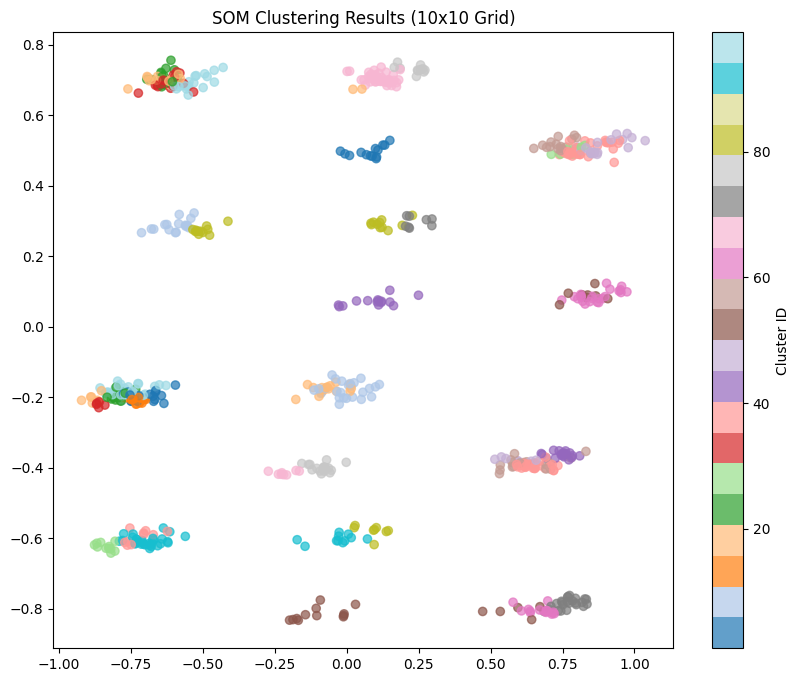

In [15]:
best_som = results[(10,10)]['model']
best_labels = results[(10,10)]['labels']

centroids = best_som.get_weights().reshape(10*10, X_scaled.shape[1])

print("\nFirst 5 cluster centroids:")
print(centroids[:5])

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=best_labels, cmap='tab20', alpha=0.7)
plt.title("SOM Clustering Results (10x10 Grid)")
plt.colorbar(label="Cluster ID")
plt.show()

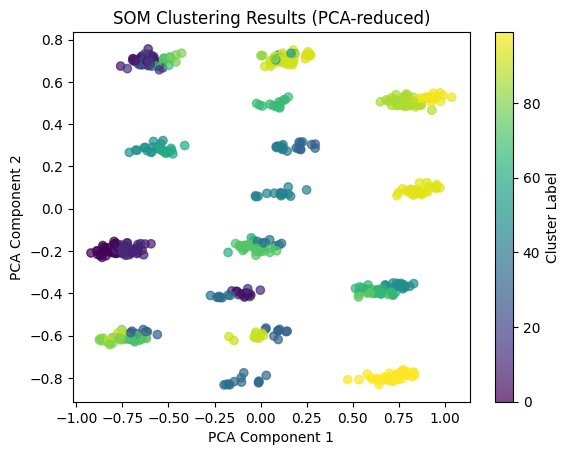

In [7]:
cluster_labels = np.array([som.winner(x) for x in X_scaled])
cluster_labels = cluster_labels[:, 0] * som_grid_cols + cluster_labels[:, 1] 

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title("SOM Clustering Results (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


--- Results for 5x5 Grid (25 clusters) ---


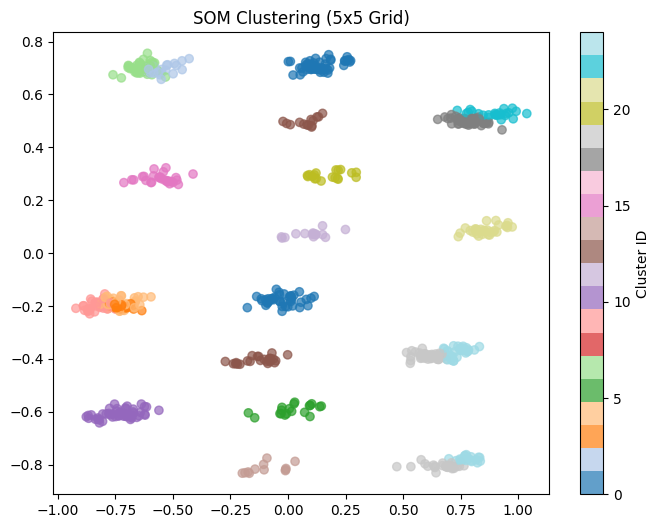


--- Results for 7x7 Grid (49 clusters) ---


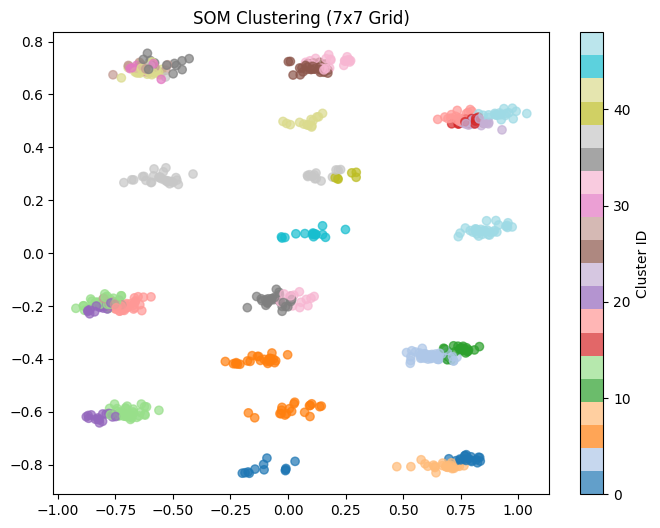


--- Results for 10x10 Grid (100 clusters) ---


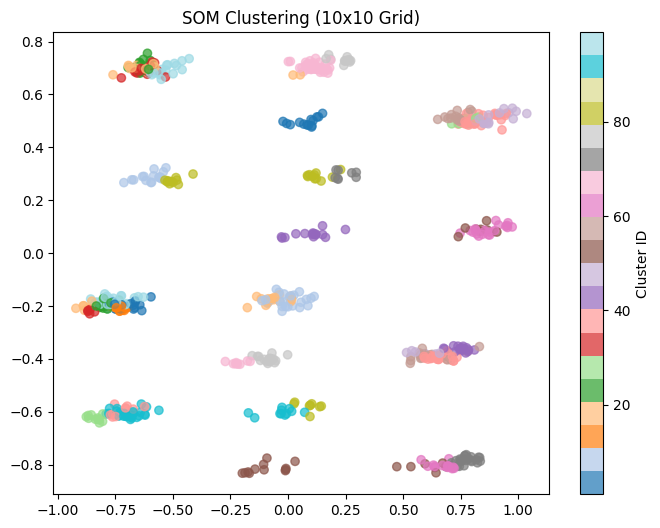

In [16]:
for size in grid_sizes:
    print(f"\n--- Results for {size[0]}x{size[1]} Grid ({size[0]*size[1]} clusters) ---")
    
    labels = results[size]['labels']
    
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab20', alpha=0.7)
    plt.title(f"SOM Clustering ({size[0]}x{size[1]} Grid)")
    plt.colorbar(label="Cluster ID")
    plt.show()

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

for size in grid_sizes:
    labels = results[size]['labels']
    
    sil_score = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    
    print(f"\nGrid Size: {size[0]}x{size[1]}")
    print(f"Number of clusters: {size[0]*size[1]}")
    print(f"Silhouette Score: {sil_score:.3f}")
    print(f"Davies-Bouldin Score: {db_score:.3f}")


Grid Size: 5x5
Number of clusters: 25
Silhouette Score: 0.298
Davies-Bouldin Score: 1.342

Grid Size: 7x7
Number of clusters: 49
Silhouette Score: 0.256
Davies-Bouldin Score: 1.346

Grid Size: 10x10
Number of clusters: 100
Silhouette Score: 0.217
Davies-Bouldin Score: 1.330



=== 5x5 Grid (25 clusters) ===
First 3 centroids:
[[9.93998172e-01 3.58906656e-01 1.77463337e-01 2.49887586e-01
  4.27300518e-01 5.21871380e-01 5.99804892e-02 9.99998037e-01
  3.50395118e-08 1.74029677e-09 2.10135769e-02 3.84290946e-01
  5.43364117e-02 5.87645566e-03]
 [9.99896740e-01 3.75343675e-01 1.94721220e-01 3.43728543e-01
  4.21296800e-01 3.91522274e-01 6.14722697e-02 9.95535292e-01
  1.57301958e-07 5.74770325e-09 9.86187557e-01 3.38291573e-01
  1.08298341e-01 1.89197350e-03]
 [9.99997079e-01 2.94287844e-01 1.27521415e-01 4.21160983e-01
  6.27590461e-01 4.99120269e-01 4.43146587e-02 7.65247929e-02
  1.50980223e-05 4.47191395e-07 9.95658309e-01 4.32050295e-01
  1.23685204e-01 8.15743685e-04]]


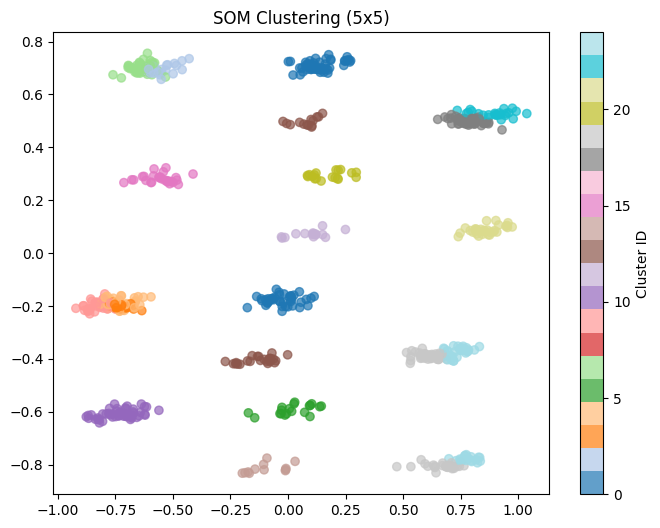


=== 7x7 Grid (49 clusters) ===
First 3 centroids:
[[3.23429487e-08 2.21604962e-01 1.85775253e-01 4.60493417e-01
  7.18407868e-01 8.29376105e-01 9.99045831e-02 9.81279183e-01
  9.69692973e-01 7.76441347e-02 3.20246469e-08 4.99518690e-01
  2.54975728e-02 3.09388855e-02]
 [7.89600315e-05 2.60558753e-01 1.12025779e-01 4.43662071e-01
  3.44991115e-01 2.49243319e-01 5.26542665e-02 1.59482456e-01
  9.96880953e-01 4.10014375e-02 1.55640024e-05 4.97805601e-01
  8.96471764e-02 5.63166578e-03]
 [5.03115428e-01 2.23095842e-01 1.19925227e-01 3.93140899e-01
  5.23531725e-01 3.55458188e-01 5.03232008e-02 6.42396517e-01
  9.93736970e-01 5.89978049e-02 8.84927013e-03 4.98828344e-01
  9.10202279e-02 1.04227606e-02]]


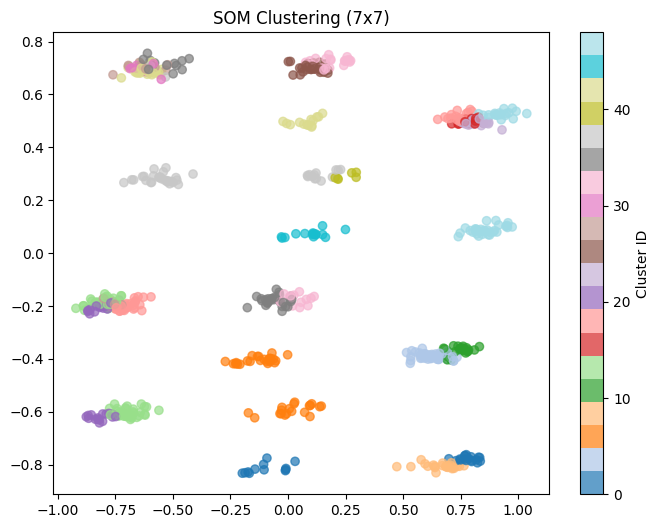


=== 10x10 Grid (100 clusters) ===
First 3 centroids:
[[5.28951311e-01 1.61232961e-01 2.29681301e-01 3.78406692e-01
  4.20791869e-01 6.20675485e-01 1.18119308e-02 2.42384527e-01
  1.26735652e-07 2.64900087e-09 2.42399336e-01 4.08132071e-01
  1.11299561e-01 2.29532730e-03]
 [9.68440531e-01 1.61941987e-01 1.60314189e-01 4.91113250e-01
  5.93164109e-01 4.27639415e-01 3.00260080e-02 3.53175445e-02
  1.76275740e-02 2.89383903e-03 1.77229098e-02 2.36846767e-01
  7.09593497e-02 9.07130558e-04]
 [9.99987688e-01 3.29035926e-01 1.32122741e-01 4.99977552e-01
  6.81220448e-01 5.11484978e-01 5.78535506e-02 4.47844957e-05
  3.09295122e-06 7.03154841e-08 4.99329189e-05 4.95853412e-01
  1.25014448e-01 4.69711712e-04]]


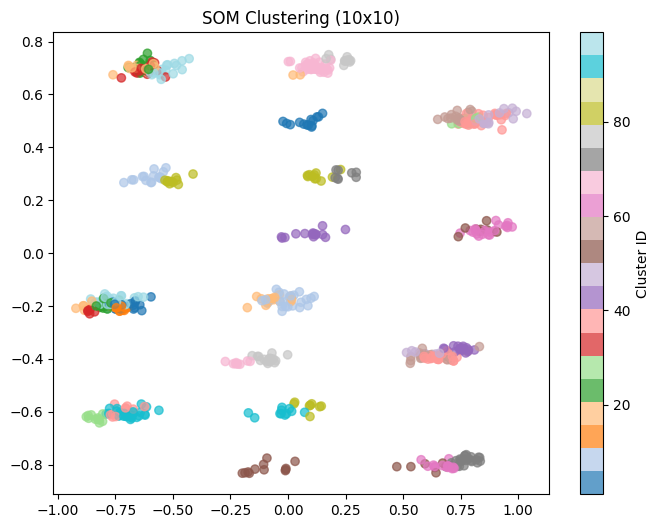

In [18]:

for size in grid_sizes:

    som = results[size]['model']
    labels = results[size]['labels']
    centroids = som.get_weights().reshape(size[0]*size[1], X_scaled.shape[1])
    

    print(f"\n=== {size[0]}x{size[1]} Grid ({size[0]*size[1]} clusters) ===")
    print("First 3 centroids:")
    print(centroids[:3])

    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab20', alpha=0.7)
    plt.title(f"SOM Clustering ({size[0]}x{size[1]})")
    plt.colorbar(label="Cluster ID")
    plt.show()